In [0]:
import pandas as pd
import numpy as np 

In [24]:
dataset=pd.read_csv('microchip.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,result1,result2,accepted
0,-0.697580,0.684940,0
1,0.961410,0.085526,0
2,-0.611180,-0.067982,0
3,0.483290,-0.184940,1
4,0.149190,-0.579680,0
...,...,...,...
113,0.016705,-0.404240,1
114,-0.467170,-0.133770,0
115,-0.392280,-0.258040,0
116,-0.375000,0.502190,1


In [0]:
##BM ALGO
from numpy import random, sqrt, log, sin, cos, pi,square
from pylab import show,hist,subplot,figure


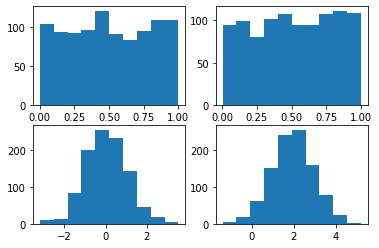

In [84]:
def gaussian(u1,u2):
  z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
  z2 = sqrt(-2*log(u1))*sin(2*pi*u2)+2
  return z1,z2


    # z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * pi * u2)
    # z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * pi * u2)+2

# uniformly distributed values between 0 and 1
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)

# run the transformation
z1,z2 = gaussian(u1,u2)

# plotting the values before and after the transformation
figure()
subplot(221) # the first row of graphs
hist(u1)     # contains the histograms of u1 and u2 
subplot(222)
hist(u2)
subplot(223) # the second contains
hist(z1)     # the histograms of z1 and z2
subplot(224)
hist(z2)


show()




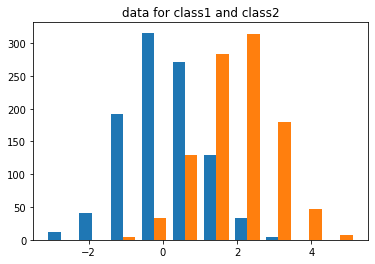

In [109]:
trainX = []
trainY = []
testX = []
testY = []


x1=[]
x2=[]
class_1=[]
class_0=[]
for i in range(dataset.shape[0]):
  if dataset.iloc[i,2]==1:
      x1.append(random.choice(z2))
      x2.append(random.choice(z2))
      # class_1.append()
  else:
      x1.append(random.choice(z1))
      x2.append(random.choice(z1))

for i in range(dataset.shape[0]):
  if(i<0.70*dataset.shape[0]):
    trainX.append([x1[i],x2[i]])
    trainY.append(dataset.iloc[i,2])
  else:
    testX.append([x1[i],x2[i]])
    testY.append(dataset.iloc[i,2])

X_new = np.c_[z1, z2]
hist(X_new)
plt.title("data for class1 and class2")

trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)


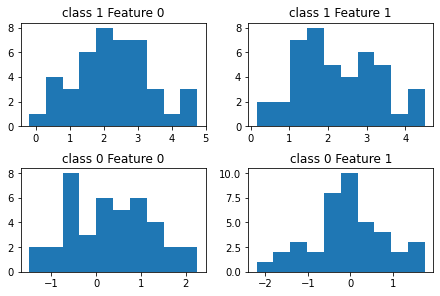

In [110]:
class_1_0 = []
class_0_0 = []
class_1_1 = []
class_0_1 = []

for i in range(trainX.shape[0]):
  if(trainY[i]==1):
    class_1_0.append(trainX[i][0])
    class_1_1.append(trainX[i][1])
  else:
    class_0_0.append(trainX[i][0])
    class_0_1.append(trainX[i][1])


fig,ax = plt.subplots(2,2,constrained_layout=True)
ax[0][0].hist(class_1_0) 
ax[0][0].set_title('class 1 Feature 0')
ax[0][1].hist(class_1_1) 
ax[0][1].set_title('class 1 Feature 1')
ax[1][0].hist(class_0_0) 
ax[1][0].set_title('class 0 Feature 0')
ax[1][1].hist(class_0_1) 
ax[1][1].set_title('class 0 Feature 1')

plt.show()

In [0]:

#covariance 

def findMean(dataX,dataY,Y):
  count = 0
  Mean = np.zeros((1,dataX.shape[1]))
  for i in range(dataX.shape[0]):
    if(dataY[i] == Y):
      Mean[0,:]+=dataX[i]
      count+=1
  return Mean/(count)


def findCov(dataX,dataY):
  covariance = np.zeros((dataX.shape[1],dataX.shape[1]))
  Mean0 = findMean(dataX,dataY,0)
  Mean1 = findMean(dataX,dataY,1)
  deviationFromMean = np.ndarray(shape = dataX.shape)
  for i in range(dataX.shape[0]):
    if(dataY[i] == 1):
      deviationFromMean[i] = np.subtract(dataX[i],Mean1)
    else:
      deviationFromMean[i] = np.subtract(dataX[i],Mean0) 
  covariance =  (deviationFromMean.T@deviationFromMean)/dataX.shape[0]
  return covariance
  

In [0]:
def calc(sigma,x,y,GivenY,dataX,dataY):

  invsigma = np.linalg.inv(sigma)
  # print(x)
  # print(findMean(dataX,dataY,GivenY))
  MeanY=findMean(dataX,dataY,GivenY)
  r = np.subtract(x,MeanY)
  # print(r)
  pi=3.14
  dim=2
  p = 1/np.sqrt(np.linalg.det(sigma)) * np.exp(-0.5*np.dot(np.dot(r,invsigma), r.T));
  return p[0][0]

##testing

def test(trainX,trainY,testX,testY):

  sigma = findCov(trainX,trainY)
  P1=0
  P0=0

  for i in range(trainY.shape[0]):
    if trainY[i]==1:
      P1 += 1
    else:
      P0 += 1 
  P1/=trainY.shape[0]
  P0/=trainY.shape[0]
  # print(P1,P0)
  count =0

  for i in range(testX.shape[0]):
    p1= calc(sigma,testX[i],testY[i],1,trainX,trainY)
    p0 = calc(sigma,testX[i],testY[i],0,trainX,trainY)
    if((P1 * p1) >= (P0 * p0)):
        out=1
    else:
        out=0
    if(out==testY[i]):
      count+=1
  print("Accuracy using Bux Muller = "+str((count/testX.shape[0])*100))

  
 


In [108]:
test(trainX,trainY,testX,testY)

Accuracy using Bux Muller = 94.28571428571428
